In [536]:
import sqlalchemy
from sqlalchemy import create_engine, text, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import inspect
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [537]:
#connect an engine to the exercise file
db_path = 'Resources/fitness.sqlite'
engine = create_engine (f'sqlite:///{db_path}')
conn = engine.connect()

In [538]:
#Checking the tables' columns and types
inspector = inspect(engine)
tables = inspector.get_table_names()
for table in tables:
    columns = inspector.get_columns(table)
    print([table])
    for x in columns:
        print(x['name'],x['type'])
    print('----')

['age']
id NUMERIC
calories_burnt DECIMAL(10, 2)
heart_rate INTEGER
age INTEGER
gender VARCHAR(10)
----
['exercise']
id NUMERIC
exercise VARCHAR(10)
duration INTEGER
calories_burnt DECIMAL(10, 2)
exercise_intensity INTEGER
----
['weight_bmi']
id NUMERIC
age INTEGER
gender VARCHAR(10)
dream_weight DECIMAL(10, 2)
actual_weight DECIMAL(10, 2)
bmi DECIMAL(10, 2)
----


In [539]:
#Dataframe for exercise table
exercise_df = pd.read_sql('select * from exercise', conn)
exercise_df

,id,exercise,duration,calories_burnt,exercise_intensity
0,1,Exercise 2,37,286.959851,5
1,2,Exercise 7,43,343.453036,5
2,3,Exercise 4,20,261.223465,4
3,4,Exercise 5,39,127.183858,10
4,5,Exercise 10,34,416.318374,3
...,...,...,...,...,...
3859,3860,Exercise 5,22,154.113144,7
3860,3861,Exercise 4,49,486.392768,5
3861,3862,Exercise 4,56,264.307731,9
3862,3863,Exercise 9,60,185.951870,1


In [540]:
#Data type for exercise.df
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3864 non-null   int64  
 1   exercise            3864 non-null   object 
 2   duration            3864 non-null   int64  
 3   calories_burnt      3864 non-null   float64
 4   exercise_intensity  3864 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 151.1+ KB


In [541]:
#Dataframe for age table
age_df = pd.read_sql('select * from age', conn)
age_df

,id,calories_burnt,heart_rate,age,gender
0,1,286.959851,170,45,Male
1,2,343.453036,142,25,Male
2,3,261.223465,148,20,Male
3,4,127.183858,170,33,Male
4,5,416.318374,118,29,Female
...,...,...,...,...,...
3859,3860,154.113144,139,20,Female
3860,3861,486.392768,160,21,Female
3861,3862,264.307731,167,57,Male
3862,3863,185.951870,128,58,Female


In [542]:
#Data type for age.df
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3864 non-null   int64  
 1   calories_burnt  3864 non-null   float64
 2   heart_rate      3864 non-null   int64  
 3   age             3864 non-null   int64  
 4   gender          3864 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 151.1+ KB


In [543]:
#Dataframe for weight_bmi table
weight_bmi_df = pd.read_sql('select * from weight_bmi', conn)
weight_bmi_df

,id,age,gender,dream_weight,actual_weight,bmi
0,1,45,Male,91.892531,96.301115,29.426275
1,2,25,Male,64.165097,61.104668,21.286346
2,3,20,Male,70.846224,71.766724,27.899592
3,4,33,Male,79.477008,82.984456,33.729552
4,5,29,Female,89.960226,85.643174,23.286113
...,...,...,...,...,...,...
3859,3860,20,Female,98.147291,96.745133,32.447764
3860,3861,21,Female,97.598957,92.700573,26.602475
3861,3862,57,Male,94.946612,96.778936,31.435348
3862,3863,58,Female,64.743906,68.662889,19.774614


In [544]:
#Data type for weight_bmi_df
weight_bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3864 non-null   int64  
 1   age            3864 non-null   int64  
 2   gender         3864 non-null   object 
 3   dream_weight   3864 non-null   float64
 4   actual_weight  3864 non-null   float64
 5   bmi            3864 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 181.2+ KB


In [545]:
# Specify the common columns between the merged table 'exercise_df' and 'age_df' 
common_columns_1 = ['id', 'calories_burnt']
#merging tables 'exercise_df' and 'age_df'
merged_table = pd.merge(exercise_df, age_df,  on=common_columns_1)

# Display the merged table
merged_table.head()

,id,exercise,duration,calories_burnt,exercise_intensity,heart_rate,age,gender
0,1,Exercise 2,37,286.959851,5,170,45,Male
1,2,Exercise 7,43,343.453036,5,142,25,Male
2,3,Exercise 4,20,261.223465,4,148,20,Male
3,4,Exercise 5,39,127.183858,10,170,33,Male
4,5,Exercise 10,34,416.318374,3,118,29,Female


In [546]:
# Specify the common columns between the merged table 'exercise_df' and 'age_df' and that of 'weight_bmi_df' table 
common_columns_2 = ['id', 'age', 'gender']

In [547]:
#Merging all three tables into 1 keeping id, age and gender common

merged_table_final = pd.merge(merged_table, weight_bmi_df,  on=common_columns_2)
# Display the merged table
merged_table_final.head()

,id,exercise,duration,calories_burnt,exercise_intensity,heart_rate,age,gender,dream_weight,actual_weight,bmi
0,1,Exercise 2,37,286.959851,5,170,45,Male,91.892531,96.301115,29.426275
1,2,Exercise 7,43,343.453036,5,142,25,Male,64.165097,61.104668,21.286346
2,3,Exercise 4,20,261.223465,4,148,20,Male,70.846224,71.766724,27.899592
3,4,Exercise 5,39,127.183858,10,170,33,Male,79.477008,82.984456,33.729552
4,5,Exercise 10,34,416.318374,3,118,29,Female,89.960226,85.643174,23.286113


In [548]:
merged_table_final.count()

id                    3864
exercise              3864
duration              3864
calories_burnt        3864
exercise_intensity    3864
heart_rate            3864
age                   3864
gender                3864
dream_weight          3864
actual_weight         3864
bmi                   3864
dtype: int64

In [549]:
# Rearrange columns
merged_reordered = merged_table_final[['id', 'age', 'gender', 'exercise', 'exercise_intensity', 'duration', 'calories_burnt', 'heart_rate', 'bmi','actual_weight', 'dream_weight']]

# Display the rearranged merged table
merged_reordered.head()

,id,age,gender,exercise,exercise_intensity,duration,calories_burnt,heart_rate,bmi,actual_weight,dream_weight
0,1,45,Male,Exercise 2,5,37,286.959851,170,29.426275,96.301115,91.892531
1,2,25,Male,Exercise 7,5,43,343.453036,142,21.286346,61.104668,64.165097
2,3,20,Male,Exercise 4,4,20,261.223465,148,27.899592,71.766724,70.846224
3,4,33,Male,Exercise 5,10,39,127.183858,170,33.729552,82.984456,79.477008
4,5,29,Female,Exercise 10,3,34,416.318374,118,23.286113,85.643174,89.960226


In [550]:
# Rename columns
merged_reordered_renamed= merged_reordered.rename(columns={'id': 'Participant ID', 'age': 'Age (Years)', 'gender': 'Gender', 
                                                           'exercise': 'Exercise Type (1-10)', 'exercise_intensity': 'Exercise Intensity', 
                                                           'duration': 'Exercise Duration (Minute)', 'calories_burnt': 'Calories Burnt (Cal)', 
                                                           'heart_rate': 'Heart Rate (BPM)', 'bmi': 'BMI','actual_weight' : 'Recorded Weight (Kg)', 
                                                           'dream_weight': 'Dream Weight (Kg)'})
merged_reordered_renamed.head()

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,Male,Exercise 2,5,37,286.959851,170,29.426275,96.301115,91.892531
1,2,25,Male,Exercise 7,5,43,343.453036,142,21.286346,61.104668,64.165097
2,3,20,Male,Exercise 4,4,20,261.223465,148,27.899592,71.766724,70.846224
3,4,33,Male,Exercise 5,10,39,127.183858,170,33.729552,82.984456,79.477008
4,5,29,Female,Exercise 10,3,34,416.318374,118,23.286113,85.643174,89.960226


In [551]:
merged_reordered_renamed['Exercise Type (1-10)'] = merged_reordered_renamed['Exercise Type (1-10)'].str.replace('Exercise ', '')

# Display the DataFrame after replacement
merged_reordered_renamed.head()


,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,Male,2,5,37,286.959851,170,29.426275,96.301115,91.892531
1,2,25,Male,7,5,43,343.453036,142,21.286346,61.104668,64.165097
2,3,20,Male,4,4,20,261.223465,148,27.899592,71.766724,70.846224
3,4,33,Male,5,10,39,127.183858,170,33.729552,82.984456,79.477008
4,5,29,Female,10,3,34,416.318374,118,23.286113,85.643174,89.960226


In [552]:
#Calories burnt during 60 mins of training for each participant for each exercise type
merged_reordered_renamed['Calories Burnt (60 min)'] = merged_reordered_renamed['Calories Burnt (Cal)'] * 60 / merged_reordered_renamed['Exercise Duration (Minute)']

merged_reordered_renamed

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg),Calories Burnt (60 min)
0,1,45,Male,2,5,37,286.959851,170,29.426275,96.301115,91.892531,465.340298
1,2,25,Male,7,5,43,343.453036,142,21.286346,61.104668,64.165097,479.236795
2,3,20,Male,4,4,20,261.223465,148,27.899592,71.766724,70.846224,783.670395
3,4,33,Male,5,10,39,127.183858,170,33.729552,82.984456,79.477008,195.667474
4,5,29,Female,10,3,34,416.318374,118,23.286113,85.643174,89.960226,734.679483
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,3860,20,Female,5,7,22,154.113144,139,32.447764,96.745133,98.147291,420.308574
3860,3861,21,Female,4,5,49,486.392768,160,26.602475,92.700573,97.598957,595.582982
3861,3862,57,Male,4,9,56,264.307731,167,31.435348,96.778936,94.946612,283.186855
3862,3863,58,Female,9,1,60,185.951870,128,19.774614,68.662889,64.743906,185.951870


In [553]:
# Rearrange columns
updated_df = merged_reordered_renamed[['Participant ID','Age (Years)','Gender', 
                                                           'Exercise Type (1-10)', 'Exercise Intensity', 
                                                           'Exercise Duration (Minute)', 'Calories Burnt (Cal)','Calories Burnt (60 min)',
                                                           'Heart Rate (BPM)','BMI','Recorded Weight (Kg)', 
                                                           'Dream Weight (Kg)']]

# Display the rearranged merged table
updated_df.head()

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,Male,2,5,37,286.959851,465.340298,170,29.426275,96.301115,91.892531
1,2,25,Male,7,5,43,343.453036,479.236795,142,21.286346,61.104668,64.165097
2,3,20,Male,4,4,20,261.223465,783.670395,148,27.899592,71.766724,70.846224
3,4,33,Male,5,10,39,127.183858,195.667474,170,33.729552,82.984456,79.477008
4,5,29,Female,10,3,34,416.318374,734.679483,118,23.286113,85.643174,89.960226


In [554]:
updated_df.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                         object
Exercise Type (1-10)           object
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)          float64
Dream Weight (Kg)             float64
dtype: object

In [555]:
# Rounds all values to 2 decimal points
updated_df_round= updated_df.round(decimals=2)  
updated_df_round.head()


,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,Male,2,5,37,286.96,465.34,170,29.43,96.30,91.89
1,2,25,Male,7,5,43,343.45,479.24,142,21.29,61.10,64.17
2,3,20,Male,4,4,20,261.22,783.67,148,27.90,71.77,70.85
3,4,33,Male,5,10,39,127.18,195.67,170,33.73,82.98,79.48
4,5,29,Female,10,3,34,416.32,734.68,118,23.29,85.64,89.96


In [556]:
# Convert necessary columns to integers
updated_df_round['Exercise Type (1-10)'] = updated_df_round['Exercise Type (1-10)'].astype(int)
updated_df_round['Recorded Weight (Kg)'] = updated_df_round['Recorded Weight (Kg)'].astype(int)
updated_df_round['Dream Weight (Kg)'] = updated_df_round['Dream Weight (Kg)'].astype(int)

In [557]:
#confirm changes
updated_df_round.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                         object
Exercise Type (1-10)            int64
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)            int64
Dream Weight (Kg)               int64
dtype: object

In [558]:
# Changing Gender value types from Object to Int by setting 'female' to 1 and 'male' to 0
gender_mapping = {'Female': 1, 'Male': 0}

# Applying to the lates dataframe

updated_df_round['Gender'] = updated_df_round['Gender'].map(gender_mapping)
updated_df_round


,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,1,45,0,2,5,37,286.96,465.34,170,29.43,96,91
1,2,25,0,7,5,43,343.45,479.24,142,21.29,61,64
2,3,20,0,4,4,20,261.22,783.67,148,27.90,71,70
3,4,33,0,5,10,39,127.18,195.67,170,33.73,82,79
4,5,29,1,10,3,34,416.32,734.68,118,23.29,85,89
...,...,...,...,...,...,...,...,...,...,...,...,...
3859,3860,20,1,5,7,22,154.11,420.31,139,32.45,96,98
3860,3861,21,1,4,5,49,486.39,595.58,160,26.60,92,97
3861,3862,57,0,4,9,56,264.31,283.19,167,31.44,96,94
3862,3863,58,1,9,1,60,185.95,185.95,128,19.77,68,64


In [559]:
#confirm changes
updated_df_round.dtypes

Participant ID                  int64
Age (Years)                     int64
Gender                          int64
Exercise Type (1-10)            int64
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)            int64
Dream Weight (Kg)               int64
dtype: object

In [560]:
# The Average 'Calories Burnt (60 min)'  for each exercise type
avg_calories_burnt_index = updated_df_round.groupby('Exercise Type (1-10)')['Calories Burnt (60 min)'].mean()
avg_calories_burnt_index

Exercise Type (1-10)
1     476.715881
2     490.769594
3     491.728623
4     511.828464
5     499.288465
6     499.767008
7     503.908497
8     485.268942
9     512.550736
10    484.847412
Name: Calories Burnt (60 min), dtype: float64

In [561]:
#Finding top 3 highest average 'Calories Burnt (60 min)'  for each exercise type
top_2_avg_calories_burnt_index = avg_calories_burnt_index.nlargest(2)
top_2_avg_calories_burnt_index

Exercise Type (1-10)
9    512.550736
4    511.828464
Name: Calories Burnt (60 min), dtype: float64

In [562]:
#finding total number of participants for each exercise
exercise_type_counts = updated_df_round['Exercise Type (1-10)'].value_counts().sort_index()
exercise_type_counts

Exercise Type (1-10)
1     403
2     345
3     385
4     371
5     404
6     381
7     386
8     397
9     394
10    398
Name: count, dtype: int64

In [563]:
#Confirming that the data in the main table are comparable based on gender and the ratio of participants for each type of exercise from each gender
# Finding corresponding number of participants from each gender groups taking on each exercise type sorted by exercise number
exercise_count_per_gender = updated_df_round.groupby(['Gender', 'Exercise Type (1-10)']).size().reset_index(name='Count of Participants').sort_values(by='Exercise Type (1-10)')
exercise_count_per_gender

,Gender,Exercise Type (1-10),Count of Participants
0,0,1,186
10,1,1,217
1,0,2,175
11,1,2,170
2,0,3,179
12,1,3,206
3,0,4,180
13,1,4,191
4,0,5,198
14,1,5,206


In [564]:
#sorting results in ascending order based on exercise type
exercise_count_per_gender_sorted = exercise_count_per_gender.sort_values(by='Exercise Type (1-10)')
exercise_count_per_gender_sorted

,Gender,Exercise Type (1-10),Count of Participants
0,0,1,186
10,1,1,217
1,0,2,175
11,1,2,170
2,0,3,179
12,1,3,206
3,0,4,180
13,1,4,191
14,1,5,206
4,0,5,198


In [565]:
# Create a dictionary mapping each exercise type to its corresponding total count
exercise_type_total_count_dict = exercise_type_counts.to_dict()

# Add a new column 'Exercise Type Total Participants' 
exercise_count_per_gender_sorted['Exercise Type Total Participants'] = exercise_count_per_gender_sorted['Exercise Type (1-10)'].map(exercise_type_total_count_dict)

exercise_count_per_gender_sorted


,Gender,Exercise Type (1-10),Count of Participants,Exercise Type Total Participants
0,0,1,186,403
10,1,1,217,403
1,0,2,175,345
11,1,2,170,345
2,0,3,179,385
12,1,3,206,385
3,0,4,180,371
13,1,4,191,371
14,1,5,206,404
4,0,5,198,404


In [566]:
#Reseting the index and starting from 1
exercise_count_per_gender_sorted.reset_index(drop=True, inplace=True)
exercise_count_per_gender_sorted.index += 1
exercise_count_per_gender_sorted

,Gender,Exercise Type (1-10),Count of Participants,Exercise Type Total Participants
1,0,1,186,403
2,1,1,217,403
3,0,2,175,345
4,1,2,170,345
5,0,3,179,385
6,1,3,206,385
7,0,4,180,371
8,1,4,191,371
9,1,5,206,404
10,0,5,198,404


In [567]:
#Adding a new column to show ratio of each gender for the participants of each exercise type
exercise_count_per_gender_sorted['Ratio %'] = exercise_count_per_gender_sorted['Count of Participants'] * 100 / exercise_count_per_gender_sorted['Exercise Type Total Participants']
exercise_count_per_gender_sorted.astype(int)

,Gender,Exercise Type (1-10),Count of Participants,Exercise Type Total Participants,Ratio %
1,0,1,186,403,46
2,1,1,217,403,53
3,0,2,175,345,50
4,1,2,170,345,49
5,0,3,179,385,46
6,1,3,206,385,53
7,0,4,180,371,48
8,1,4,191,371,51
9,1,5,206,404,50
10,0,5,198,404,49


In [568]:
# Display the filtered table for exercise 4 and 9
gender_ratio_exe_filtered = exercise_count_per_gender_sorted[(exercise_count_per_gender_sorted['Exercise Type (1-10)'] == 4) | (exercise_count_per_gender_sorted['Exercise Type (1-10)'] == 9)]
gender_ratio_exe_filtered.reset_index(drop=True, inplace=True)
gender_ratio_exe_filtered.astype(int)
#Ratio for all exercise types from each gender are comparable and close to 50%-50%

,Gender,Exercise Type (1-10),Count of Participants,Exercise Type Total Participants,Ratio %
0,0,4,180,371,48
1,1,4,191,371,51
2,1,9,192,394,48
3,0,9,202,394,51


In [569]:
# Display the filtered main table for exercise 4 and 9
updated_df_round_exe_filtered = updated_df_round[(updated_df_round['Exercise Type (1-10)'] == 4) | (updated_df_round['Exercise Type (1-10)'] == 9)]
updated_df_round_exe_filtered.reset_index(drop=True, inplace=True)
updated_df_round_exe_filtered.index += 1
updated_df_round_exe_filtered

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
1,3,20,0,4,4,20,261.22,783.67,148,27.90,71,70
2,7,18,0,9,10,53,457.63,518.07,103,34.59,61,65
3,8,42,0,4,2,25,272.96,655.10,104,22.05,62,64
4,20,49,0,9,8,59,103.34,105.09,149,20.45,84,88
5,22,29,0,9,2,37,131.46,213.17,135,20.54,52,54
...,...,...,...,...,...,...,...,...,...,...,...,...
761,3850,56,0,9,3,54,113.94,126.60,102,31.93,67,68
762,3853,37,1,9,3,35,132.48,227.11,178,28.65,66,64
763,3861,21,1,4,5,49,486.39,595.58,160,26.60,92,97
764,3862,57,0,4,9,56,264.31,283.19,167,31.44,96,94


In [570]:
#save the table to csv file
updated_df_round_exe_filtered.to_csv('Final_Cleaned_Data.csv', index=False)

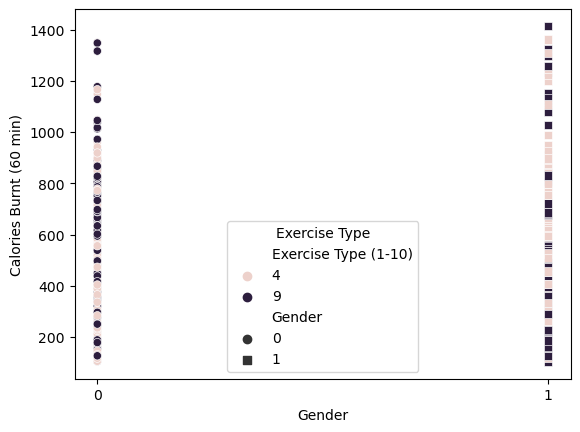

In [571]:
# Create a scatter plot with seaborn for exercise 4 & 9 for each gender

sns.scatterplot(data=updated_df_round_exe_filtered, y='Calories Burnt (60 min)', x='Gender', hue='Exercise Type (1-10)', style='Gender', markers=['o', 's'])
plt.legend(title='Exercise Type')
plt.xticks([0, 1])
plt.savefig("seaborn.png")
plt.show()

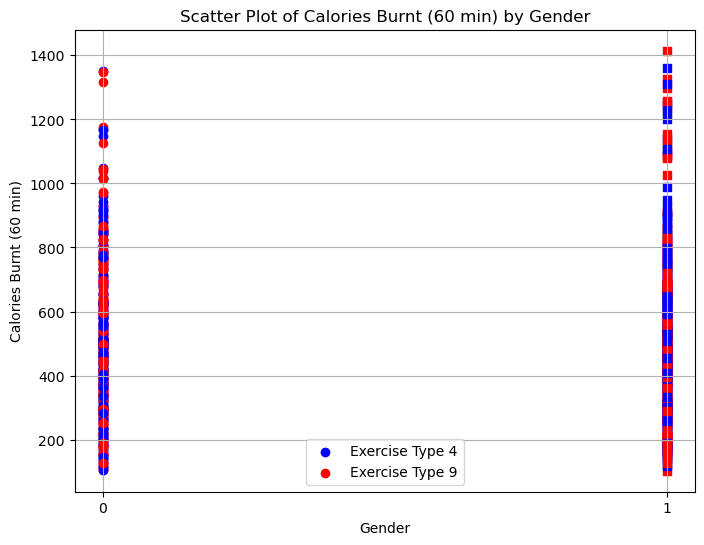

In [572]:
# Create a scatter plot with Matplotlib for exercise 4 & 9 for each gender
plt.figure(figsize=(8, 6))

# Iterate over the filtered data and plot each point
for index, row in updated_df_round_exe_filtered.iterrows():
    # Define marker shape based on gender
    marker = 'o' if row['Gender'] == 0 else 's'
    # Define marker color based on exercise type
    color = 'blue' if row['Exercise Type (1-10)'] == 4 else 'red'
    # Plot the point
    plt.scatter(row['Gender'], row['Calories Burnt (60 min)'], color=color, marker=marker)


plt.xticks([0, 1])
plt.legend(['Exercise Type 4', 'Exercise Type 9'])
plt.ylabel('Calories Burnt (60 min)')
plt.xlabel('Gender')
plt.title('Scatter Plot of Calories Burnt (60 min) by Gender')
plt.grid(True)
plt.savefig("Matplotlib.png")
plt.show()

In [573]:
# Create a scatter plot with Altair for exercise 4 & 9 for each gender

scatter_plot = alt.Chart(updated_df_round_exe_filtered).mark_circle().encode(
    y='Calories Burnt (60 min)',
    x=alt.X('Gender:N', axis=alt.Axis(values=[0, 1], title='Gender')),
    color=alt.Color('Exercise Type (1-10):N', title='Exercise Type'),
    shape=alt.Shape('Gender:N', title='Gender')
).properties(
    width=400,
    height=200
)

scatter_plot

alt.Chart(...)

In [574]:
#Benefits of using Altair
# Export the JSON specification
json_spec = scatter_plot.to_dict()

# Save JSON to a file
with open('gender_calories_plot.json', 'w') as f:
    json.dump(json_spec, f)

In [575]:
# Read the JSON file
with open('gender_calories_plot.json', 'r') as f:
    json_spec = json.load(f)

# Recreate the chart from the JSON specification
recreated_chart = alt.Chart.from_dict(json_spec)

# Display the recreated chart
recreated_chart

alt.Chart(...)